# 아이리스 형태소 분석

## Iris 데이터 확인

In [0]:
import numpy as np
from sklearn import datasets

In [0]:
# 내장함수인 load_iris
# 변수를 활용하기 전에 Type을 확인하는 것이 중요 - 활용방법 알 수 있음
# Bunch
iris = datasets.load_iris()
type(iris)

In [0]:
print(type(iris), iris['feature_names'])
# 다른 사람이 만든 코드를 볼 때, 어떻게 데이터를 뽑아오는 지 확인
# iris는 [브라켓] 과 ['키']를 통해 가져옴 -> 딕셔너리
# 자료를 수집한 경우 변수가 숫자 1개, 문자 1개일리는 없음 -> 리스트, 딕셔너리일 가능성

In [0]:
iris.keys()

In [0]:
print(iris['DESCR'])

### Iris 데이터 구조 이해

Iris plants dataset

\

** 데이터셋 특징 **
- 3개의 클래스, 각각 50개의 인스턴스 (저장공간)
- 속성의 종류 : 4가지 측정 값과 클래스
- 속성 정보
  - sepal length(cm), sepal width(cm), petal length(cm), petal width(cm)
  - 클래스 : Iris-Setosa, Iris-Versicolour, Iris-Virginica

\

** 데이터 구조 **
- data,	target,	target_names,	DESCR,	feature_names,	filename 의 6개 열로 구성
  - data : array 형식
  - target : array 형식
  - target_names : 3행 1열 array 형식
  - DESCR : string 형식, Description
  - feature_names : 4행 1열 array 형식
  - filename : 1쉘의 string 형식

## 20200408 Try - Dimension Reduction

In [0]:
#data 확인
iris

In [0]:
import numpy as np

In [0]:
#전처리
dataset_iris = iris['data']
dataset_iris

#array 로 변경
iris_array = np.array(dataset_iris)
iris_array

In [0]:
#mean 구하기
iris_mean = np.mean(iris_array[:,:4],axis=0)
iris_mean

#median 구하기
iris_median = np.median(iris_array[:,:4],axis=0)

#std 구하기
iris_std = np.std(iris_array[:,:4],axis=0)

#var 구하기
iris_var = np.var(iris_array[:,:4],axis=0)

#max 구하기
iris_max = np.max(iris_array[:,:4],axis=0)

#min 구하기
iris_min = np.min(iris_array[:,:4],axis=0)

#데이터 취합
data_result = {'mean' :iris_mean,'median' :iris_median,'std' : iris_std,'var': iris_var, 'max' : iris_max,'min' :iris_min }
('열별 통계 값은 다음과 같습니다. ', data_result)

In [0]:
sepal_lenth = dataset_iris[:,0]
sepal_width = dataset_iris[:,1]
petal_lenth = dataset_iris[:,2]
petal_width = dataset_iris[:,3]

for i in range(len(iris.feature_names)):
  x = dataset_iris[:,i]
  x_mean = dataset_iris[:,i].mean()
  x_median = np.median(dataset_iris[:,i])
  x_std = dataset_iris[:,i].std()

#print(x_mean,x_median,x_std )

  msk_mean = ((x >= x_mean - 0.05) & (x <= x_mean + 0.05))
  msk_median = ((x >= x_median - 0.05) & (x <= x_median + 0.05))
  msk_std = ((x >= x_std - 0.05) & (x <= x_std + 0.05))

#  print(msk_mean, msk_median, msk_std)

  main_mean = x[msk_mean]
  main_median = x[msk_median]
  main_std = x[msk_std]

#  print(main_mean, main_median, main_std)

  print('대표값 개수 구하기')     #쏠림현상을 파악하기 위해서
  print(iris.feature_names[i])
  print('평균 : ', len(main_mean))
  print('중간값 : ', len(main_median))
  print('표준편차 : ', len(main_std),'\n')
  

##Scatter plots

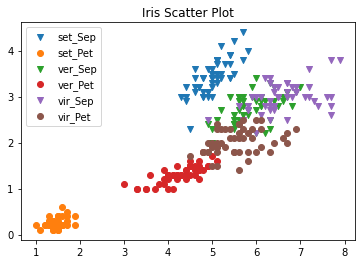

In [0]:
from matplotlib import pyplot as plt
import numpy as np

#iris class(종류)별 그래프 그리기
#종류 3종 : 'setosa', 'versicolor', 'virginica'
#속성 : 'sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'

#속성으로 구분하기
sepal_length = iris['data'][:,0]
sepal_width = iris['data'][:,1]
petal_length = iris['data'][:,2]
petal_width = iris['data'][:,3]

iris_class = iris['feature_names']
iris_target = iris['target']


#속성을 클래스 별로 구분하기
for i in range(len(iris_class)):
  s_Li = sepal_length[iris_target ==i]
  s_Wi = sepal_width[iris_target ==i]
  p_Li = petal_length[iris_target ==i]
  p_Wi = petal_width[iris_target ==i]
  plt.scatter(s_Li,s_Wi, marker='v')
  plt.scatter(p_Li,p_Wi,marker='o')
plt.title('Iris Scatter Plot')
plt.legend(['set_Sep','set_Pet','ver_Sep','ver_Pet','vir_Sep','vir_Pet'])
plt.show()

###더해보기

iris 종류별 통계값 나타내기